In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import time
from pathlib import Path
import pandas as pd
from PIL import Image
from weavingtools.annotation_tools import *
from weavingtools.annotation_tools import plot_by_record, open_image
from weavingtools.linkage_tools import *
from weavingtools.embedding_tools import *
import scipy.spatial as sp
import ipyannotations.generic
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
sns.set()

In [75]:
collection_db = load_db("hw",'heritage_weaver','google/siglip-base-patch16-224')
collection_db_ft = load_db("hw",'heritage_weaver_ft','Kaspar/siglip-heritage-weaver-name')
collection_db_ft_text = load_db("hw",'heritage_weaver_ft_text','Kaspar/siglip-heritage-weaver-text')

collection_df = pd.read_csv('data/heritage_weaver_data.csv')


In [76]:

top_n = 20
annotator = 'KB'

In [96]:
query = 'telophone' #'a telegraph' #'a telehpone' #'a laser table' #'an electrophone'
experiment = '1'

In [97]:
# retrieve records
if experiment == '1':
    filters = {'modality':'image'}
elif experiment == '2':
    filters = {'modality':'text'}
elif experiment == '3':
    filters = {}



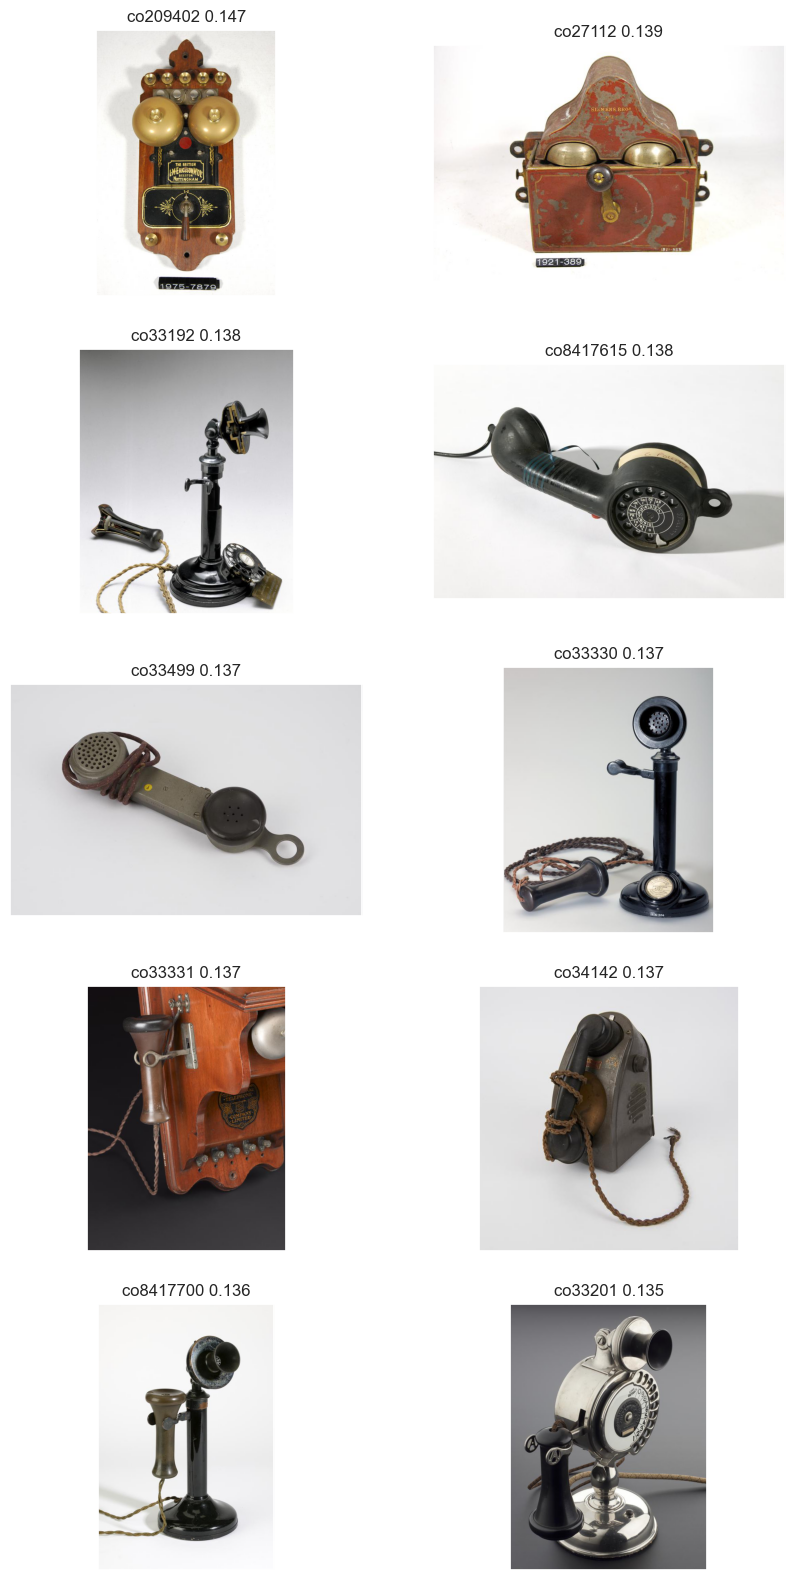

In [98]:
results = collection_db.query(query_texts=[query],where=filters, n_results=top_n)
query_df = plot_query_results(results, source='img_path') # collection_df,



In [99]:
query_df

,collection,img_path,img_url,modality,name,record_id,similarity
0,smg,smg_imgs/425|827|medium_1975_7879__0004_.jpg,https://coimages.sciencemuseumgroup.org.uk/425...,image,telephone switchboard,co209402,0.146719
1,smg,smg_imgs/419|911|medium_1921_389__0003_.jpg,https://coimages.sciencemuseumgroup.org.uk/419...,image,block instrument,co27112,0.139156
2,smg,smg_imgs/34|790|medium_1926_0482.jpg,https://coimages.sciencemuseumgroup.org.uk/34/...,image,telephone,co33192,0.138233
3,smg,smg_imgs/236|200|medium_cd0192_021_051215_BTCE...,https://coimages.sciencemuseumgroup.org.uk/236...,image,telephone,co8417615,0.137953
4,smg,smg_imgs/493|970|medium_SMG00305522.jpg,https://coimages.sciencemuseumgroup.org.uk/493...,image,,co33499,0.137105
5,smg,smg_imgs/36|846|medium_1959_0304__0004_.jpg,https://coimages.sciencemuseumgroup.org.uk/36/...,image,telephones,co33330,0.136671
6,smg,smg_imgs/48|732|medium_1959_0305__0003_.jpg,https://coimages.sciencemuseumgroup.org.uk/48/...,image,telephone,co33331,0.136617
7,smg,smg_imgs/491|518|medium_SMG00305413.jpg,https://coimages.sciencemuseumgroup.org.uk/491...,image,telephones,co34142,0.136562
8,smg,smg_imgs/242|281|medium_cd0146_010_050822_CG_2...,https://coimages.sciencemuseumgroup.org.uk/242...,image,table telephone,co8417700,0.135585
9,smg,smg_imgs/23|836|medium_1926_1056__0003_.jpg,https://coimages.sciencemuseumgroup.org.uk/23/...,image,telephone,co33201,0.135500


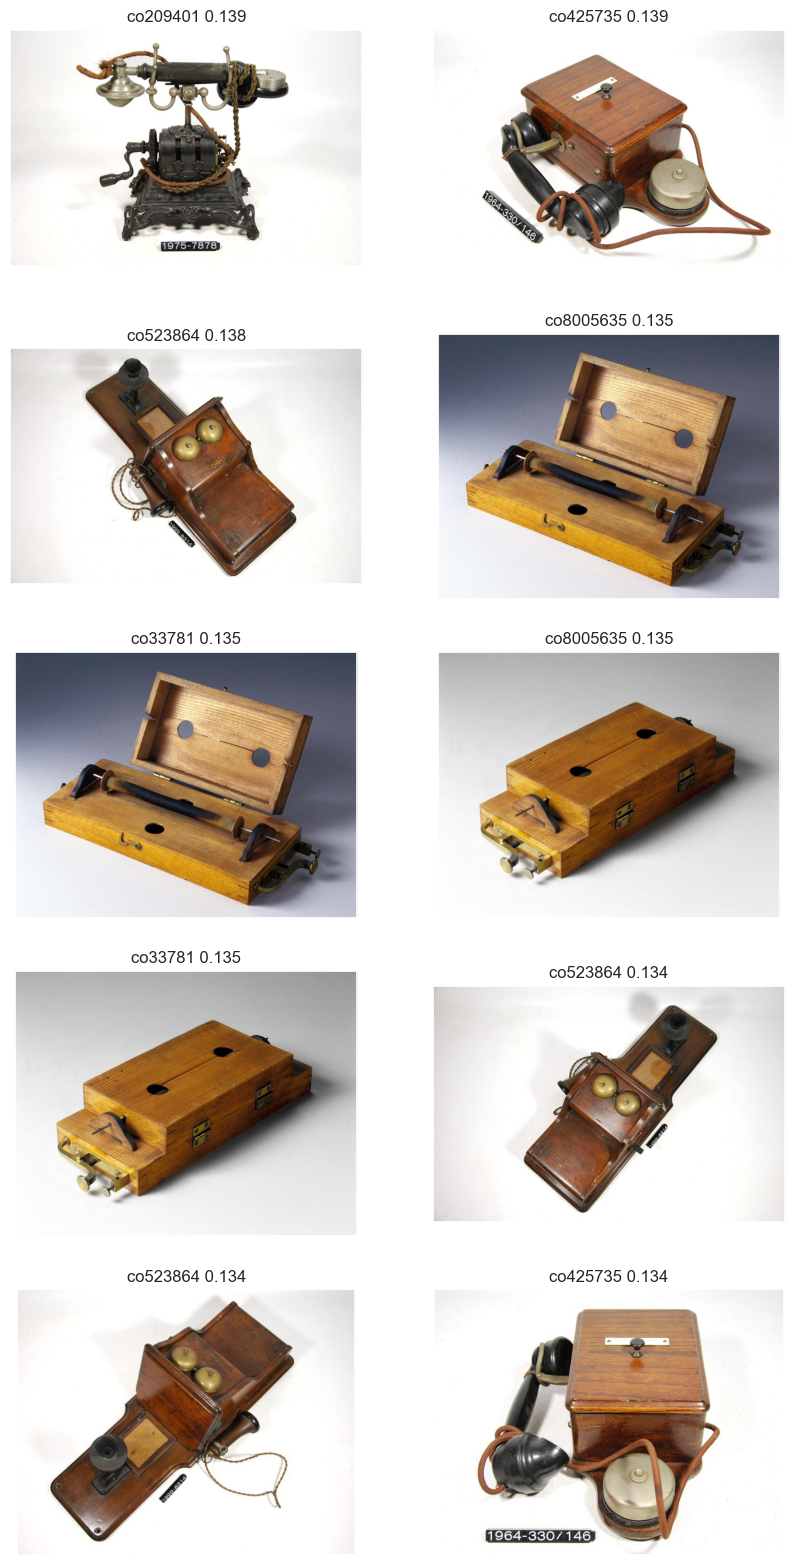

In [100]:
results = collection_db_ft.query(query_texts=[query],where=filters, n_results=top_n)
query_df = plot_query_results(results, source='img_path') # collection_df,



In [101]:
query_df

,collection,img_path,img_url,modality,name,record_id,similarity
0,smg,smg_imgs/423|814|medium_1975_7878__0003_.jpg,https://coimages.sciencemuseumgroup.org.uk/423...,image,telephones,co209401,0.139451
1,smg,smg_imgs/423|810|medium_1964_330_146__0005_.jpg,https://coimages.sciencemuseumgroup.org.uk/423...,image,telephones,co425735,0.139173
2,smg,smg_imgs/420|720|medium_1999_8314__0010_.jpg,https://coimages.sciencemuseumgroup.org.uk/420...,image,telephone,co523864,0.137731
3,smg,smg_imgs/34|598|medium_1923_0273_0002__0003_.jpg,https://coimages.sciencemuseumgroup.org.uk/34/...,image,telephone,co8005635,0.135057
4,smg,smg_imgs/34|598|medium_1923_0273_0002__0003_.jpg,https://coimages.sciencemuseumgroup.org.uk/34/...,image,telephones,co33781,0.135057
5,smg,smg_imgs/34|597|medium_1923_0273_0002__0002_.jpg,https://coimages.sciencemuseumgroup.org.uk/34/...,image,telephone,co8005635,0.135042
6,smg,smg_imgs/34|597|medium_1923_0273_0002__0002_.jpg,https://coimages.sciencemuseumgroup.org.uk/34/...,image,telephones,co33781,0.135042
7,smg,smg_imgs/420|716|medium_1999_8314__0007_.jpg,https://coimages.sciencemuseumgroup.org.uk/420...,image,telephone,co523864,0.134328
8,smg,smg_imgs/420|721|medium_1999_8314__0002_.jpg,https://coimages.sciencemuseumgroup.org.uk/420...,image,telephone,co523864,0.134214
9,smg,smg_imgs/423|808|medium_1964_330_146__0001_.jpg,https://coimages.sciencemuseumgroup.org.uk/423...,image,telephones,co425735,0.133924


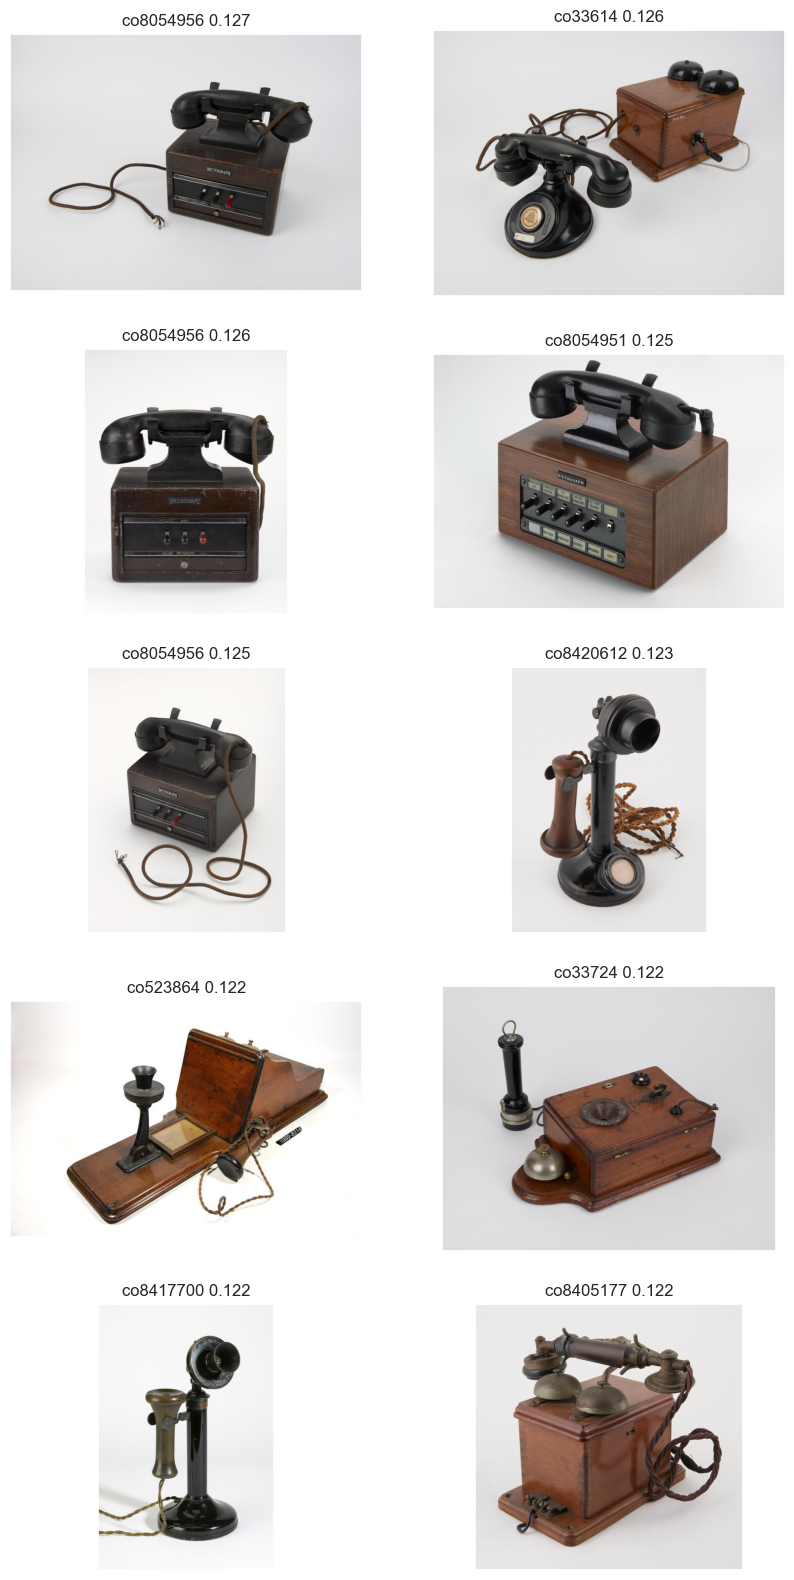

In [102]:
results = collection_db_ft_text.query(query_texts=[query],where=filters, n_results=top_n)
query_df = plot_query_results(results, source='img_path') # collection_df,



In [103]:
query_df

,collection,img_path,img_url,modality,name,record_id,similarity
0,smg,smg_imgs/491|552|medium_SMG00305586.jpg,https://coimages.sciencemuseumgroup.org.uk/491...,image,telephones,co8054956,0.126616
1,smg,smg_imgs/490|894|medium_SMG00305559.jpg,https://coimages.sciencemuseumgroup.org.uk/490...,image,NaN,co33614,0.126497
2,smg,smg_imgs/239|786|medium_2004_0206__0002_.jpg,https://coimages.sciencemuseumgroup.org.uk/239...,image,telephones,co8054956,0.125733
3,smg,smg_imgs/241|477|medium_2004_0201__0002_.jpg,https://coimages.sciencemuseumgroup.org.uk/241...,image,telephones,co8054951,0.125463
4,smg,smg_imgs/239|785|medium_2004_0206__0001_.jpg,https://coimages.sciencemuseumgroup.org.uk/239...,image,telephones,co8054956,0.125205
5,smg,smg_imgs/477|842|medium_SMG00247197.jpg,https://coimages.sciencemuseumgroup.org.uk/477...,image,telephone,co8420612,0.122940
6,smg,smg_imgs/420|719|medium_1999_8314__0001_.jpg,https://coimages.sciencemuseumgroup.org.uk/420...,image,telephone,co523864,0.122323
7,smg,smg_imgs/493|968|medium_SMG00305520.jpg,https://coimages.sciencemuseumgroup.org.uk/493...,image,telephone,co33724,0.122198
8,smg,smg_imgs/242|281|medium_cd0146_010_050822_CG_2...,https://coimages.sciencemuseumgroup.org.uk/242...,image,table telephone,co8417700,0.122121
9,smg,smg_imgs/477|846|medium_SMG00247202.jpg,https://coimages.sciencemuseumgroup.org.uk/477...,image,telephone,co8405177,0.122002


In [104]:
print(collection_db.count())
print(collection_db_ft.count())
print(collection_db_ft_text.count())

97587
97594
97594
